Nama: Cindy Pramudita

NIM: 2304220040

Prodi: Statistika dan Sains Data

MK: Prediksi Modern & Machine Learning

Praktisi: Fitria Nur Aida, S.Stat., M.MT.

**Tugas 1:**

1.   Scraping program untuk website "https://books.toscrape.com/"
2.   Dikumpulkan di GitHub masing-masing
3.   Expected output : dataframe 1000 buku
4.   Dataframe terdiri atas:
*   category
*   code
*   cover
*   title
*   rating
*   price (excl. tax)
*   price (incl. tax)
*   tax
*   stock status
*   number of stock available
*   description
*   number of reviews

In [2]:
# install library
!pip install beautifulsoup4 requests

In [4]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from google.colab import auth

In [9]:
# scrapping config
url = 'https://books.toscrape.com/'
response = requests.get(url)
response

<Response [200]>

**HTTP Status Codes**

*   200: ok
*   301/302: redirect
*   403: forbidden
*   404: not found
*   429: too many request
*   500: internal server error


In [12]:
# start acces web
pages = []
i = 1
while True:
  url_page = f"{url}catalogue/page-{i}.html"
  page_response = requests.get(url_page)
  if page_response.status_code == 200:
    pages.append(url_page)
    i += 1
  else:
    break # biar ga kena limit kasih jeda
print(f"Found {len(pages)} pages.")

Found 50 pages.


In [24]:
# list pages
pages

['https://books.toscrape.com/catalogue/page-1.html',
 'https://books.toscrape.com/catalogue/page-2.html',
 'https://books.toscrape.com/catalogue/page-3.html',
 'https://books.toscrape.com/catalogue/page-4.html',
 'https://books.toscrape.com/catalogue/page-5.html',
 'https://books.toscrape.com/catalogue/page-6.html',
 'https://books.toscrape.com/catalogue/page-7.html',
 'https://books.toscrape.com/catalogue/page-8.html',
 'https://books.toscrape.com/catalogue/page-9.html',
 'https://books.toscrape.com/catalogue/page-10.html',
 'https://books.toscrape.com/catalogue/page-11.html',
 'https://books.toscrape.com/catalogue/page-12.html',
 'https://books.toscrape.com/catalogue/page-13.html',
 'https://books.toscrape.com/catalogue/page-14.html',
 'https://books.toscrape.com/catalogue/page-15.html',
 'https://books.toscrape.com/catalogue/page-16.html',
 'https://books.toscrape.com/catalogue/page-17.html',
 'https://books.toscrape.com/catalogue/page-18.html',
 'https://books.toscrape.com/catalogu

In [16]:
# testing scrap 1 page
page7 = 'https://books.toscrape.com/catalogue/page-7.html'
page_response = requests.get(page7)
page_soup = BeautifulSoup(page_response.content, 'html.parser')
books =[url + 'catalogue/' + link.get('href') for link in page_soup.select('article h3 a')]
books

['https://books.toscrape.com/catalogue/algorithms-to-live-by-the-computer-science-of-human-decisions_880/index.html',
 'https://books.toscrape.com/catalogue/a-world-of-flavor-your-gluten-free-passport_879/index.html',
 'https://books.toscrape.com/catalogue/a-piece-of-sky-a-grain-of-rice-a-memoir-in-four-meditations_878/index.html',
 'https://books.toscrape.com/catalogue/a-murder-in-time_877/index.html',
 'https://books.toscrape.com/catalogue/a-flight-of-arrows-the-pathfinders-2_876/index.html',
 'https://books.toscrape.com/catalogue/a-fierce-and-subtle-poison_875/index.html',
 'https://books.toscrape.com/catalogue/a-court-of-thorns-and-roses-a-court-of-thorns-and-roses-1_874/index.html',
 'https://books.toscrape.com/catalogue/unqualified-how-god-uses-broken-people-to-do-big-things_873/index.html',
 'https://books.toscrape.com/catalogue/you-are-what-you-love-the-spiritual-power-of-habit_872/index.html',
 'https://books.toscrape.com/catalogue/william-shakespeares-star-wars-verily-a-new-h

In [17]:
# full get all book urls
book_urls = []
for page in pages:
  page_response = requests.get(page)
  page_soup = BeautifulSoup(page_response.content, 'html.parser')
  book_links = [url + 'catalogue/' + link.get('href') for link in page_soup.select('article h3 a')]
  book_urls.extend(book_links)
  print(f"{page} : {len(book_links)} books")

print(f"Total books : {len(book_urls)}")

https://books.toscrape.com/catalogue/page-1.html : 20 books
https://books.toscrape.com/catalogue/page-2.html : 20 books
https://books.toscrape.com/catalogue/page-3.html : 20 books
https://books.toscrape.com/catalogue/page-4.html : 20 books
https://books.toscrape.com/catalogue/page-5.html : 20 books
https://books.toscrape.com/catalogue/page-6.html : 20 books
https://books.toscrape.com/catalogue/page-7.html : 20 books
https://books.toscrape.com/catalogue/page-8.html : 20 books
https://books.toscrape.com/catalogue/page-9.html : 20 books
https://books.toscrape.com/catalogue/page-10.html : 20 books
https://books.toscrape.com/catalogue/page-11.html : 20 books
https://books.toscrape.com/catalogue/page-12.html : 20 books
https://books.toscrape.com/catalogue/page-13.html : 20 books
https://books.toscrape.com/catalogue/page-14.html : 20 books
https://books.toscrape.com/catalogue/page-15.html : 20 books
https://books.toscrape.com/catalogue/page-16.html : 20 books
https://books.toscrape.com/catalo

In [18]:
# list url books
book_urls

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

In [21]:
# example: get the first book url
book_url_1 = book_urls[0]

# send GET request
book_response = requests.get(book_url_1)

book_soup = BeautifulSoup(book_response.content, 'html.parser')

# Parse the HTML content
book_soup = BeautifulSoup(book_response.content, 'html.parser')

# extract book category
# the breadcrumb navigation contains the category in the 3rd <li> element
category = book_soup.select_one('.breadcrumb li:nth-child(3) a').get_text()
print("Category:", category)

# extract book title
title = book_soup.select_one('h1').get_text()
print("Title:", title)

# extract book rating
# the rating is found in a <p> element with class 'star-rating'
rating = book_soup.select_one('p.star-rating')['class'][1]  # the second class indicates rating
print("Rating:", rating)

# extract book description
# the product description is located after the 'product_description' ID
description_element = book_soup.select_one('#product_description ~ p')
description = description_element.get_text() if description_element else "No description available"
print("Description:", description)

# extract cover image url
# The image is within the #product_gallery img tag
cover = url + book_soup.select_one('#product_gallery img')['src'].replace('../', '')
print("Cover:", cover)

# extract product information table
# extracts table rows from the product info section
product_info = book_soup.select('table.table-striped tr')
print("\nProduct Information:")

# continue extracting additional product details from the table
# we'll loop through the product_info rows and store them in a dictionary
product_data = {}
for row in product_info:
    key = row.th.get_text(strip=True)
    value = row.td.get_text(strip=True)
    product_data[key] = value

# extract fields safely with .get() to avoid KeyError if something is missing
code = product_data.get('UPC', 'N/A')
price_excl_tax = product_data.get('Price (excl. tax)', 'N/A')
price_incl_tax = product_data.get('Price (incl. tax)', 'N/A')
tax = product_data.get('Tax', 'N/A')
stock_status = product_data.get('Availability', 'N/A')
num_reviews = product_data.get('Number of reviews', 'N/A')

# extract numeric number of stock available using regex
import re
stock_match = re.search(r'\d+', stock_status)
num_stock_available = stock_match.group(0) if stock_match else "N/A"

# print the results
print(f"Code: {code}")
print(f"Price (excl. tax): {price_excl_tax}")
print(f"Price (incl. tax): {price_incl_tax}")
print(f"Tax: {tax}")
print(f"Stock status: {stock_status}")
print(f"Number of stock available: {num_stock_available}")
print(f"Number of reviews: {num_reviews}")

Category: Poetry
Title: A Light in the Attic
Rating: Three
Description: It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Bab

In [22]:
from tqdm import tqdm

# base url
url = "https://books.toscrape.com/"

# get all book links (already scraped them before)
book_urls = []

# get all 50 pages of books (20 books per page)
for i in range(1, 51):
    page_url = f"{url}catalogue/page-{i}.html"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for link in soup.select('h3 a'):
        book_urls.append(url + 'catalogue/' + link['href'].replace('../', ''))

print(f"Total books found: {len(book_urls)}")

# create empty list to store all book data
data = []

# iterate over all book urls
for j, book_url in enumerate(tqdm(book_urls, desc="Scraping books")):
    # send GET request
    book_response = requests.get(book_url)
    book_soup = BeautifulSoup(book_response.content, 'html.parser')

    # extract book category
    category = book_soup.select_one('.breadcrumb li:nth-child(3) a').get_text(strip=True)

    # extract book title
    title = book_soup.select_one('h1').get_text(strip=True)

    # extract book rating
    rating = book_soup.select_one('p.star-rating')['class'][1]

    # extract description
    description_element = book_soup.select_one('#product_description ~ p')
    description = description_element.get_text(strip=True) if description_element else "No description available"

    # extract cover image url
    cover = url + book_soup.select_one('#product_gallery img')['src'].replace('../', '')

    # extract product information table
    product_info = book_soup.select('table.table-striped tr')
    product_data = {}
    for row in product_info:
        key = row.th.get_text(strip=True)
        value = row.td.get_text(strip=True)
        product_data[key] = value

    # extract fields safely with .get()
    code = product_data.get('UPC', 'N/A')
    price_excl_tax = product_data.get('Price (excl. tax)', 'N/A')
    price_incl_tax = product_data.get('Price (incl. tax)', 'N/A')
    tax = product_data.get('Tax', 'N/A')
    stock_status = product_data.get('Availability', 'N/A')
    num_reviews = product_data.get('Number of reviews', 'N/A')

    # extract number of stock available using regex
    stock_match = re.search(r'\d+', stock_status)
    num_stock_available = stock_match.group(0) if stock_match else "N/A"

    # append the data to list
    data.append({
        'book_url': book_url,
        'category': category,
        'code': code,
        'cover': cover,
        'title': title,
        'rating': rating,
        'price (excl. tax)': price_excl_tax,
        'price (incl. tax)': price_incl_tax,
        'tax': tax,
        'stock status': stock_status,
        'number of stock available': num_stock_available,
        'description': description,
        'number of reviews': num_reviews
    })

# convert to dataframe
df = pd.DataFrame(data)
df.head()

# optionally save to csv
df.to_csv("books_toscrape_full.csv", index=False)
print("✅ scraping complete. data saved as 'books_toscrape_full.csv'")

Total books found: 1000


Scraping books: 100%|██████████| 1000/1000 [10:01<00:00,  1.66it/s]

✅ scraping complete. data saved as 'books_toscrape_full.csv'


In [25]:
# preview dataset
df = pd.DataFrame(data)
df.head()

,book_url,category,code,cover,title,rating,price (excl. tax),price (incl. tax),tax,stock status,number of stock available,description,number of reviews
0,https://books.toscrape.com/catalogue/a-light-i...,Poetry,a897fe39b1053632,https://books.toscrape.com/media/cache/fe/72/f...,A Light in the Attic,Three,£51.77,£51.77,£0.00,In stock (22 available),22,It's hard to imagine a world without A Light i...,0
1,https://books.toscrape.com/catalogue/tipping-t...,Historical Fiction,90fa61229261140a,https://books.toscrape.com/media/cache/08/e9/0...,Tipping the Velvet,One,£53.74,£53.74,£0.00,In stock (20 available),20,"""Erotic and absorbing...Written with starling ...",0
2,https://books.toscrape.com/catalogue/soumissio...,Fiction,6957f44c3847a760,https://books.toscrape.com/media/cache/ee/cf/e...,Soumission,One,£50.10,£50.10,£0.00,In stock (20 available),20,"Dans une France assez proche de la nôtre, un h...",0
3,https://books.toscrape.com/catalogue/sharp-obj...,Mystery,e00eb4fd7b871a48,https://books.toscrape.com/media/cache/c0/59/c...,Sharp Objects,Four,£47.82,£47.82,£0.00,In stock (20 available),20,"WICKED above her hipbone, GIRL across her hear...",0
4,https://books.toscrape.com/catalogue/sapiens-a...,History,4165285e1663650f,https://books.toscrape.com/media/cache/ce/5f/c...,Sapiens: A Brief History of Humankind,Five,£54.23,£54.23,£0.00,In stock (20 available),20,From a renowned historian comes a groundbreaki...,0


In [27]:
# basic data overview

# basic info
df.info()

# missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# top 5 categories by number of books
print("\nTop 5 categories:")
print(df['category'].value_counts().head())

# average price by category
df['price_excl_tax'] = df['price (excl. tax)'].str.replace('£','').astype(float)
avg_price = df.groupby('category')['price_excl_tax'].mean().sort_values(ascending=False)
print("\nAverage price by category:")
print(avg_price.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   book_url                   1000 non-null   object
 1   category                   1000 non-null   object
 2   code                       1000 non-null   object
 3   cover                      1000 non-null   object
 4   title                      1000 non-null   object
 5   rating                     1000 non-null   object
 6   price (excl. tax)          1000 non-null   object
 7   price (incl. tax)          1000 non-null   object
 8   tax                        1000 non-null   object
 9   stock status               1000 non-null   object
 10  number of stock available  1000 non-null   object
 11  description                1000 non-null   object
 12  number of reviews          1000 non-null   object
dtypes: object(13)
memory usage: 101.7+ KB

Missing values per column

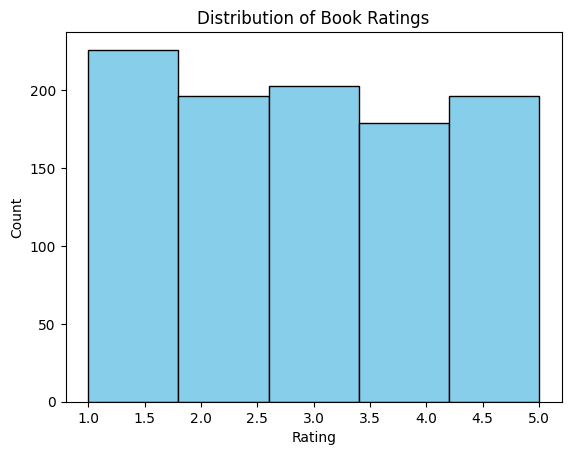

In [28]:
# rating distribution
import matplotlib.pyplot as plt

# convert textual rating (One, Two, etc.) to numeric scale
rating_map = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}
df['rating_num'] = df['rating'].map(rating_map)

plt.hist(df['rating_num'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-523487309.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_num', y='price_excl_tax', data=df, palette='viridis')


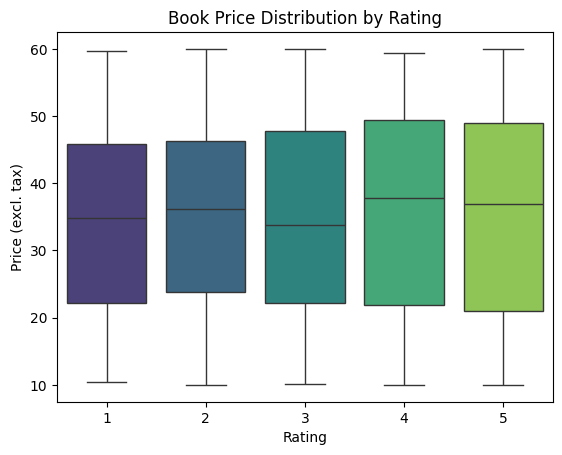

In [29]:
# correlation between rating and price
import seaborn as sns

sns.boxplot(x='rating_num', y='price_excl_tax', data=df, palette='viridis')
plt.title("Book Price Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Price (excl. tax)")
plt.show()

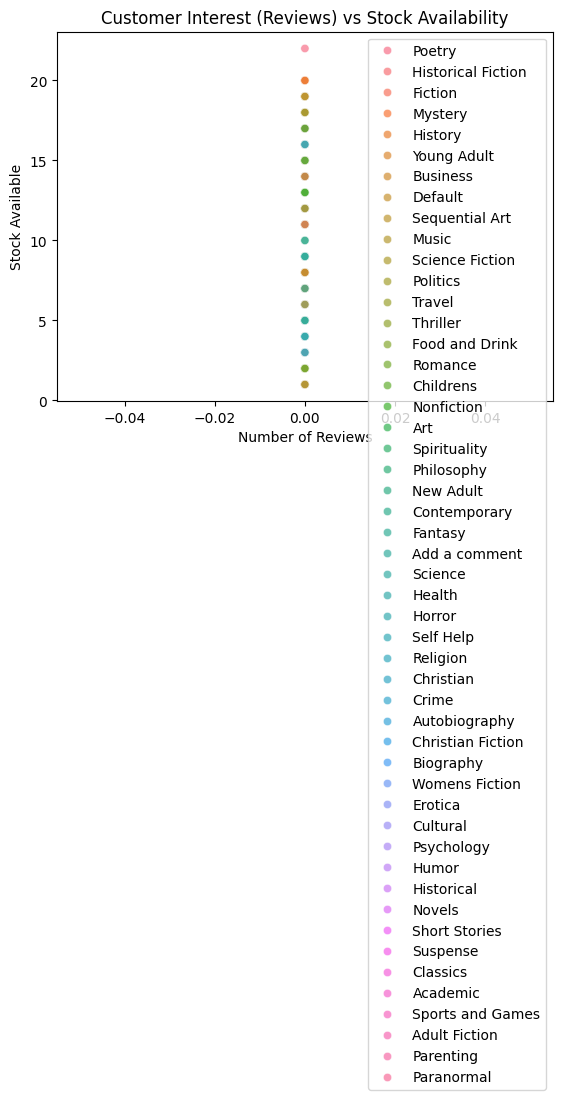

In [30]:
# stock vs reviews (interest vs availability)
df['num_reviews'] = df['number of reviews'].astype(int)
df['num_stock'] = pd.to_numeric(df['number of stock available'], errors='coerce')

sns.scatterplot(x='num_reviews', y='num_stock', hue='category', data=df, alpha=0.7)
plt.title("Customer Interest (Reviews) vs Stock Availability")
plt.xlabel("Number of Reviews")
plt.ylabel("Stock Available")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

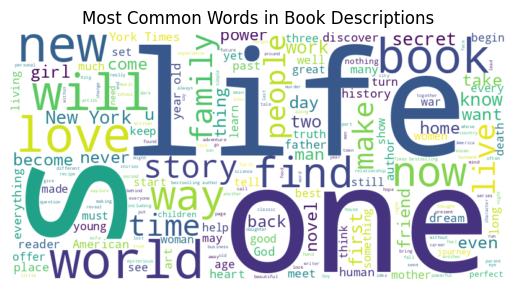

In [31]:
# wordcloud
from wordcloud import WordCloud

text = " ".join(df['description'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Book Descriptions")
plt.show()

### **Conclusion:**

Praktik ini menunjukkan bagaimana web scraping dapat digunakan untuk mengumpulkan dan menganalisis data produk buku secara otomatis dari situs publik. Dengan memanfaatkan BeautifulSoup, requests, dan pandas, kita berhasil membangun dataset lengkap berisi informasi harga, rating, stok, dan deskripsi buku.

Hasilnya membuka peluang analisis seperti tren harga antar kategori, hubungan rating dengan popularitas, hingga pola ketersediaan stok. Proyek ini membuktikan bahwa web scraping adalah fondasi penting dalam data-driven insights yang bisa diterapkan di e-commerce dan analisis pasar digital.